<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Ice_Melting_Calculation_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authored by Onri Jay Benally (2025)

Open Access (CC-BY-4.0)

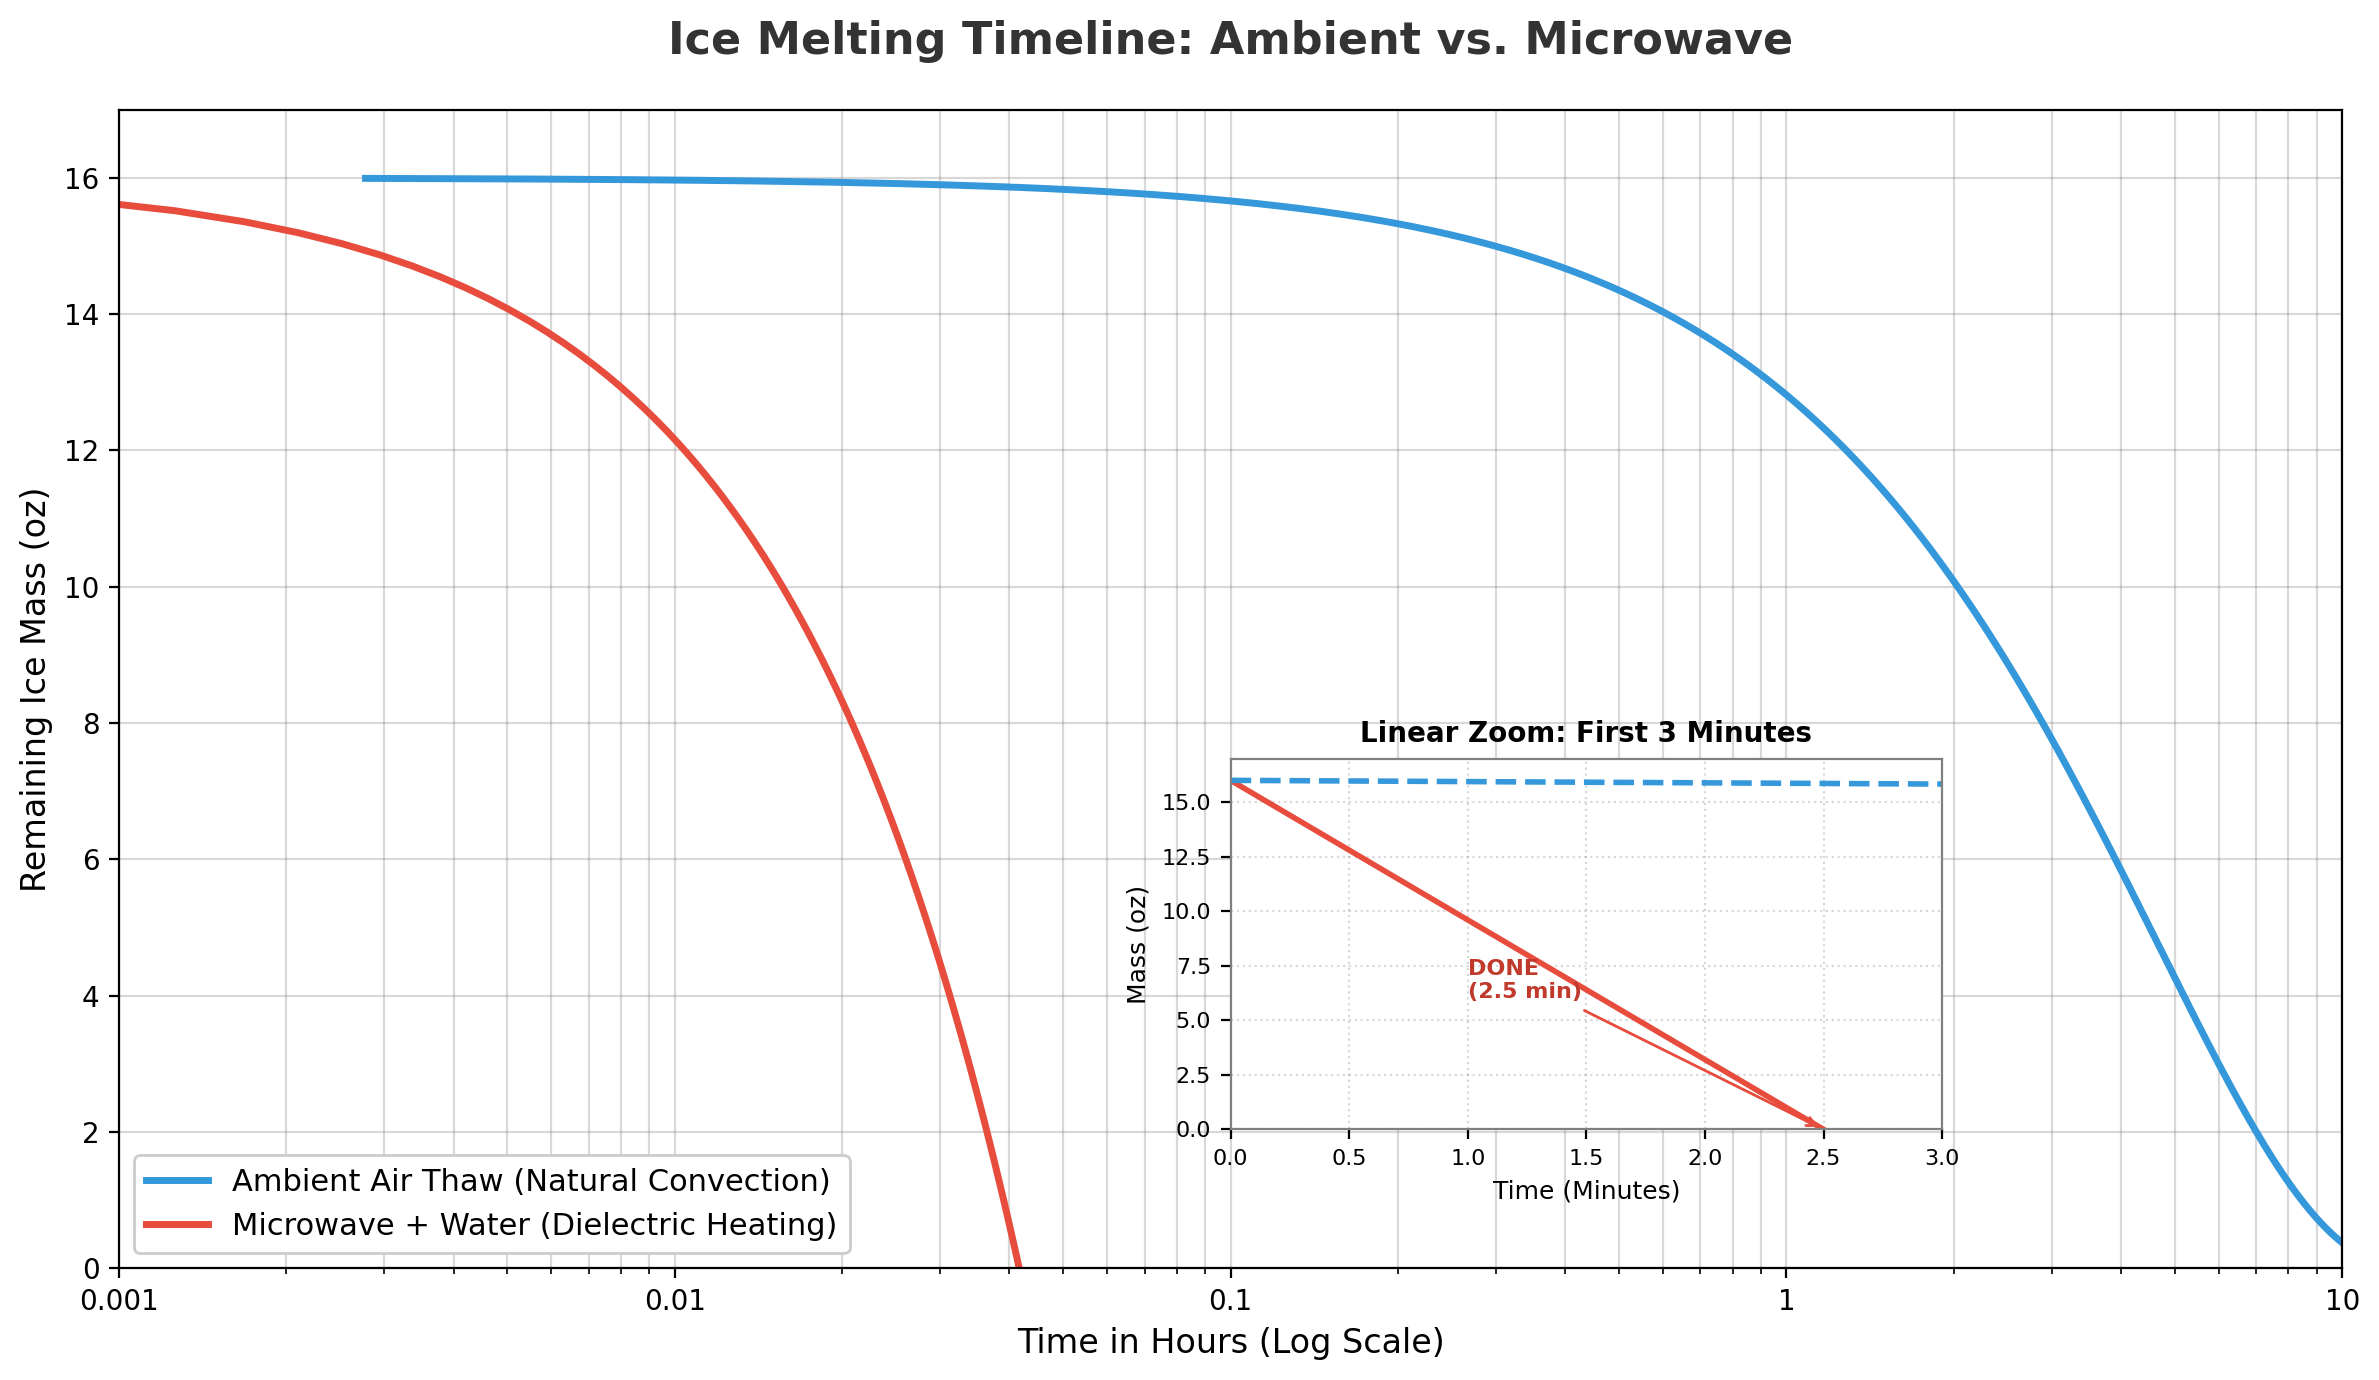

In [3]:
"""
Ice Melting Simulation: Log-Scale (White Background).

This script simulates the thermodynamic melting process of a 16 oz block of ice.
It features:
1. White background styling.
2. Logarithmic Time Axis (Main Plot).
3. Repositioned and scaled Inset Plot (Bottom Right).
"""

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


def run_simulation():
    """
    Run the physics simulation and generate a semi-log plot with a linear inset.
    """
    # --- 1. Constants & Setup ---
    oz_to_kg = 0.0283495
    initial_mass_oz = 16.0
    initial_mass_kg = initial_mass_oz * oz_to_kg
    latent_heat = 334000  # J/kg

    # Ambient Parameters
    h_ambient = 12.0
    dT_ambient = 20.0
    rho_ice = 917.0
    geom_factor = 6 * (1 / rho_ice)**(2/3)

    # Microwave Parameters (2.5 minutes / 150 seconds)
    total_energy_needed = initial_mass_kg * latent_heat
    microwave_duration_sec = 150.0
    microwave_power_watts = total_energy_needed / microwave_duration_sec

    # --- 2. Simulation Loops ---

    # Simulation A: Ambient
    dt = 10.0
    time_ambient = [0.0]
    mass_ambient_kg = [initial_mass_kg]

    current_mass = initial_mass_kg
    current_time = 0.0

    while current_mass > 0:
        surface_area = geom_factor * (current_mass**(2/3))
        q_dot = h_ambient * surface_area * dT_ambient
        dm = (q_dot * dt) / latent_heat
        current_mass -= dm
        current_time += dt
        if current_mass < 0:
            current_mass = 0
        time_ambient.append(current_time)
        mass_ambient_kg.append(current_mass)

    # Simulation B: Microwave
    time_mw = np.linspace(0, microwave_duration_sec, 100)
    mass_mw_kg = initial_mass_kg - (
        (microwave_power_watts * time_mw) / latent_heat
    )
    mass_mw_kg = np.maximum(mass_mw_kg, 0)

    # Unit Conversions
    time_ambient_hours = np.array(time_ambient) / 3600
    mass_ambient_oz = np.array(mass_ambient_kg) / oz_to_kg

    time_mw_minutes = time_mw / 60
    time_mw_hours = time_mw / 3600
    mass_mw_oz = mass_mw_kg / oz_to_kg

    # --- 3. Visualization ---

    # Force default style (White background)
    plt.style.use('default')

    plt.rcParams['figure.dpi'] = 200
    fig, ax = plt.subplots(figsize=(12, 7))

    # Explicitly set background to white
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    # -- Main Plot (Logarithmic Time) --

    # Ambient Line
    ax.plot(
        time_ambient_hours[1:],
        mass_ambient_oz[1:],
        color='#3498db',
        linewidth=2.5,
        label='Ambient Air Thaw (Natural Convection)'
    )

    # Microwave Line
    ax.plot(
        time_mw_hours[1:],
        mass_mw_oz[1:],
        color='#e74c3c',
        linewidth=2.5,
        label='Microwave + Water (Dielectric Heating)'
    )

    # Set X-Axis to Log Scale
    ax.set_xscale('log')

    # Titles and Labels
    ax.set_title(
        'Ice Melting Timeline: Ambient vs. Microwave',
        fontsize=16,
        fontweight='bold',
        pad=20,
        color='#333333'
    )
    ax.set_xlabel('Time in Hours (Log Scale)', fontsize=12)
    ax.set_ylabel('Remaining Ice Mass (oz)', fontsize=12)

    # Set limits
    ax.set_xlim(0.001, 10)
    ax.set_ylim(0, 17)

    # Custom ticks
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3g'))

    # Legend
    ax.legend(loc='lower left', frameon=True, fontsize=11, facecolor='white', framealpha=1)

    # Grid (Light gray for white bg)
    ax.grid(True, which="both", ls="-", alpha=0.3, color='gray')

    # -- Inset Plot (Bottom Right, Shrink 0.8x) --
    # Shifted Left (set to 0.5)
    ax_ins = ax.inset_axes([0.5, 0.12, 0.32, 0.32])
    ax_ins.set_facecolor('white')

    # Plot MW data in the inset (Minutes)
    ax_ins.plot(
        time_mw_minutes,
        mass_mw_oz,
        color='#e74c3c',
        linewidth=2,
        label='Microwave'
    )

    # Plot Ambient start (Minutes)
    ambient_slice_idx = int(300 / dt)
    ax_ins.plot(
        np.array(time_ambient[:ambient_slice_idx]) / 60,
        mass_ambient_oz[:ambient_slice_idx],
        color='#3498db',
        linewidth=2,
        linestyle='--',
        label='Ambient'
    )

    # Inset formatting
    ax_ins.set_title('Linear Zoom: First 3 Minutes', fontsize=10, fontweight='bold')
    ax_ins.set_xlabel('Time (Minutes)', fontsize=9)
    ax_ins.set_ylabel('Mass (oz)', fontsize=9)
    ax_ins.set_xlim(0, 3)
    ax_ins.set_ylim(0, 17)
    ax_ins.grid(True, alpha=0.3, linestyle=':', color='gray')
    ax_ins.tick_params(axis='both', which='major', labelsize=8)

    # Add text annotation in inset
    ax_ins.annotate(
        'DONE\n(2.5 min)',
        xy=(2.5, 0),
        xytext=(1.0, 6),
        arrowprops=dict(arrowstyle="->", color='#e74c3c'),
        color='#c0392b',
        fontsize=8,
        fontweight='bold'
    )

    # Add a border to the inset for clarity
    for spine in ax_ins.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(0.8)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    run_simulation()